### Load EBook Data

In [2]:
from collections import defaultdict
import re

from bs4 import BeautifulSoup
from ebooklib import epub
import ebooklib

In [3]:
def transform_epub_to_html(epub_path):
    book = epub.read_epub(epub_path)
    chapters = defaultdict(str)
    for item in book.get_items():
        name = item.get_name()
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            chapters[name] = item.get_content()
    return chapters

In [4]:
def transform_html_to_text(html):
    blacklist = ['[document]', 'noscript', 'header', 'html', 'meta', 'head', 'input', 'script']
    soup = BeautifulSoup(html, 'html.parser')
    output = ''
    for text in soup.find_all(text=True):
        if text.parent.name in blacklist:
            continue
        output += (' ' + text)
    return output

In [5]:
def load_epub(epub_path):
    chapters = transform_epub_to_html(epub_path)
    book = defaultdict(str)
    for chapter, html in chapters.items():
        chapter_found = re.search(r'The_Catcher_in_the_Rye_split_([\d]{3}).html', chapter)
        if chapter_found:
            chapter = int(chapter_found.group(1))
            text = transform_html_to_text(html)
            text = re.sub(r'[\s][\s]+', ' ', text)
            text = text.strip()
            book[chapter] = text
    return book    

In [52]:
epub_path = '../ebook/J. D. Salinger - The Catcher in the Rye (1951, Penguin Books Ltd).epub'
book = load_epub(epub_path)

In [53]:
book.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [56]:
book[26]

"26 That's all I'm going to tell about. I could probably tell you what I did after I went home, and how I got sick and all, and what school I'm supposed to go to next fall, after I get out of here, but I don't feel like it. I really don't. That stuff doesn't interest me too much right now. A lot of people, especially this one psychoanalyst guy they have here, keeps asking me if I'm going apply myself when I go back to school next September. It's such a stupid question, in my opinion. I mean how do you know what you're going to do till you do it? The answer is, you don't. I think I am, but how do I know? I swear it's a stupid question. D.B. isn't as bad as the rest of them, but he keeps asking me a lot of questions, too. He drove over last Saturday with this English babe that's in this new picture he's writing. She was pretty affected, but very good-looking. Anyway, one time when she went to the ladies' room way the hell down in the other wing D.B. asked me what I thought about all this

----

### Q1. How long each chapter is?
* Count the number of words separated by space
* Count the length of character

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [100]:
def get_book_length_information(book):
    N = len(book)
    chapters = sorted(list(book.keys()))
    length_by_character = [0] * N
    length_by_word = [0] * N
    length_by_unique_word = [0] * N

    for chapter in chapters:
        length_by_character[chapter] = len(book[chapter])
        length_by_word[chapter] = len(book[chapter].split())
        length_by_unique_word[chapter] = len(set(book[chapter].split()))
    
    book_length_information = pd.DataFrame(
        zip(chapters, length_by_character, length_by_word, length_by_unique_word),
        columns=['chapter', 'length_char', 'length_word', 'length_unique_word']
    )
    return book_length_information

In [101]:
book_length_information = get_book_length_information(book)
book_length_information


,chapter,length_char,length_word,length_unique_word
0,0,52,11,10
1,1,9961,1909,742
2,2,16500,3196,1048
3,3,18806,3620,1144
4,4,14459,2751,941
5,5,8905,1727,633
6,6,10663,2106,720
7,7,11531,2200,819
8,8,10394,2014,784
9,9,13029,2515,932


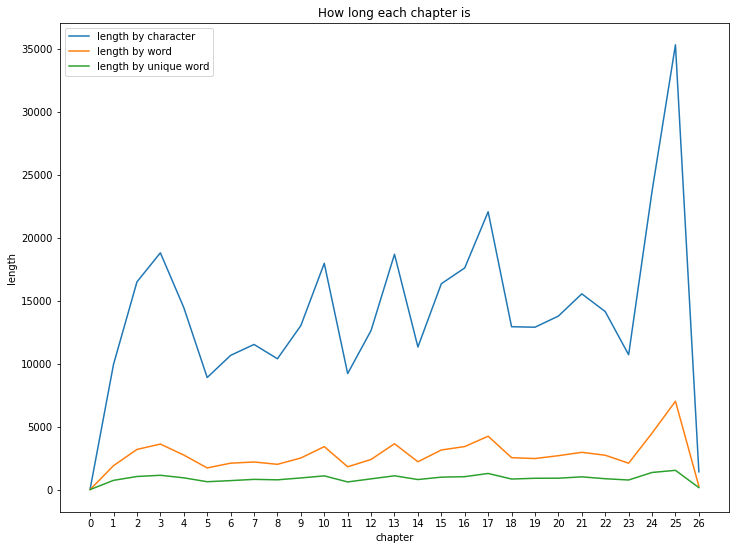

In [109]:
chapter = book_length_information.chapter
length_char = book_length_information.length_char
length_word = book_length_information.length_word
length_unique_word = book_length_information.length_unique_word

plt.figure(figsize=(12, 9))
sns.lineplot(x=chapter, y=length_char, label='length by character')
sns.lineplot(x=chapter, y=length_word, label='length by word')
sns.lineplot(x=chapter, y=length_unique_word, label='length by unique word')

plt.xlabel('chapter')
plt.ylabel('length')
plt.title('How long each chapter is')

plt.xticks(chapter)

plt.legend()

plt.show()

----

### Q2. What the words consist of?
* Are there really loads of "bad words?"

In [66]:
import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer, wordpunct_tokenize

In [11]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
nltk.data.path.append('/Users/dhsong/Workspaces/Data Read Books/the-catcher-in-the-rye/nltk_data')

In [6]:
epub_path = '../ebook/J. D. Salinger - The Catcher in the Rye (1951, Penguin Books Ltd).epub'
book = load_epub(epub_path)

In [8]:
book.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [37]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('don\'t', pos=nltk.corpus.wordnet.VERB)

"don't"

In [253]:
apostrophe = {
    'isn\'t': 'is not',
    'wasn\'t': 'was not',
    'aren\'t': 'are not',
    'weren\'t': 'were not',
    'don\'t': 'do not',
    'doesn\'t': 'does not',
    'didn\'t': 'did not',
    'i\'ll': 'i will',
    'you\'ll': 'you will',
    'he\'ll': 'he will',
    'she\'ll': 'she will',
    'they\'ll': 'they will',
    'can\'t': 'can not',
    'couldn\'t': 'could not',
    'wouldn\'t': 'would not',
    'they\'re': 'they are',
    'i\'m': 'i am',
    'he\'s': 'he is',
    'she\'s': 'she is',
    'it\'s': 'it is',
    'you\'re': 'you are',
    'that\'s': 'that is',
    'there\'s': 'there is',
    'he\'d': 'he had',
    'she\'d': 'she had',
    'you\'ve': 'you have',
    'i\'ve': 'i have',
    'i\'d': 'i had',
    'how\'s': 'how is',
    'how\'ve': 'how have',
    'c\'mon': 'come on',
    'spencer\'d': 'spencer had',
    'somebody\'d': 'somebody had',
    'we\'d': 'we had',
    'who\'s': 'who is',
    'm\'boy': 'my boy',
    'what\'d': 'what had',
    'what\'s': 'what is',
    'haven\'t': 'have not',
    'something\'s': 'something is',
    'would\'ve': 'would have',
    'hasn\'t': 'has not',
    'not\'ve': 'not have',
    'should\'ve': 'should have',
    'wife\'ll': 'wife will',
    'must\'ve': 'must have',
    '\'bout': 'about',
    'everything\'s': 'everything is',
    'won\'t': 'will not',
    'ackley\'d': 'ackley had',
    'hell\'s': 'hell is',
    '\'em': 'them',
    'you\'d': 'you had',
    'cryin\'': 'crying',
    'we\'re': 'we are',
    'where\'s': 'where is',
    'they\'d': 'they had',
    'goin\'': 'going',
    'need\'s': 'need is',
    'where\'dja': 'where did you',
    'how\'d': 'how would',
    'caddy\'d': 'caddied',
    'could\'ve': 'could have',
    'where\'d': 'where did',
    'had\'ve': 'had have',
    'y\'awake': 'you awake',
    'it\'ll': 'it will',
    'what\'re': 'what are',
    'there\'d': 'there would',
    'what\'re': 'what are',
    'nobody\'s': 'nobody is',
    'grandmother\'d': 'grandmother had',
    'somebody\'s': 'somebody is',
    'stradlater\'d': 'stradlater had',
    'morrow\'ll': 'morrow will',
    'everybody\'s': 'everybody is',
    'shouldn\'t\'ve': 'should not have',
    'tonight\'s': 'tonight is',
    'callin\'': 'calling',
    'tomorrow\'s': 'tomorrow is',
    'caulfield\'s': 'caulfield is',
    'bein\'': 'being',
    'shouldn\'t': 'should not',
    'band\'s': 'band is',
    'here\'s': 'here is',
    'mother\'d': 'mother would',
    'buyin\'': 'buying',
    'hadn\'t': 'had not',
    'with\'s': 'with whose',
    'girl\'s': 'girl is',
    'we\'ll': 'we will',
    'phoebe\'d': 'phoebe would',
    'man\'s': 'man is',
    'phoebe\'ll': 'phoebe will',
    'everybody\'ll': 'everybody will',
    'to\'ve': 'to have',
    'someone\'d': 'someone had',
    'york\'s': 'york is',
    'ain\'t': 'am not',
    'nature\'d': 'nature would',
    'nothin\'s': 'nothin is',
    'nobody\'d': 'nobody would',
    'who\'ve': 'who have',
    'who\'d': 'who had'
}

In [261]:
import re
apostrophe_counter = defaultdict(int)

for n in book.keys():
    chapter = book[n]
    tokenizer = PunktSentenceTokenizer()
    for sentence in tokenizer.tokenize(chapter):
        sentence = sentence.lower()
        if '\'' in sentence:
            for s in re.findall('([\w]*\'[[\w]*)', sentence):
                apostrophe_counter[s] += 1
sorted(apostrophe_counter.items(), key=lambda x: x[1], reverse=True)

[("didn't", 399),
 ("don't", 300),
 ("i'm", 227),
 ("i'd", 212),
 ("it's", 147),
 ("wouldn't", 138),
 ("wasn't", 132),
 ("that's", 129),
 ("you're", 116),
 ("couldn't", 102),
 ("can't", 83),
 ("he's", 79),
 ("i'll", 70),
 ("she's", 68),
 ("he'd", 63),
 ("they're", 54),
 ("isn't", 49),
 ("she'd", 44),
 ("you'd", 38),
 ("they'd", 32),
 ("would've", 28),
 ("god's", 28),
 ("should've", 27),
 ("doesn't", 27),
 ("what's", 26),
 ("won't", 26),
 ("c'mon", 25),
 ("i've", 20),
 ("'ve", 20),
 ("let's", 19),
 ("weren't", 18),
 ("hadn't", 17),
 ("you'll", 16),
 ("how's", 16),
 ("somebody's", 15),
 ("stradlater's", 15),
 ("who's", 13),
 ("aren't", 13),
 ("'", 13),
 ("we'd", 12),
 ("'bout", 12),
 ("there's", 11),
 ("o'clock", 11),
 ("nobody's", 11),
 ("shouldn't", 11),
 ("'s", 11),
 ("nobody'd", 10),
 ("hell's", 9),
 ("'em", 9),
 ("could've", 8),
 ("here's", 8),
 ("ernie's", 8),
 ("phoebe's", 8),
 ("you've", 7),
 ("they'll", 7),
 ("girl's", 7),
 ("allie's", 7),
 ("banky's", 7),
 ("guy's", 7),
 ("some

In [77]:
# tokenizer = PunktSentenceTokenizer()
# text = tokenizer.tokenize(book[1])[0]
# for word, pos in pos_tag(wordpunct_tokenize(text)):
#     if pos.startswith('J'):
#         pos = nltk.corpus.wordnet.ADJ
#     elif pos.startswith('V'):
#         pos = nltk.corpus.wordnet.VERB
#     elif pos.startswith('N'):
#         pos = nltk.corpus.wordnet.NOUN
#     elif pos.startswith('R'):
#         pos = nltk.corpus.wordnet.ADV
#     else:
#         pos = nltk.corpus.wordnet.NOUN

#     print(lemmatizer.lemmatize(word, pos))